In [31]:
import pandas as pd
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [32]:
stk_data = yf.Ticker("SPY")
print(stk_data.ticker)
df_data = stk_data.history(period='10y')

SPY


In [33]:
df_data['Week'] = df_data.index.isocalendar().week
df_data['Day'] = df_data.index.isocalendar().day

df_data['PrevDayChng'] = df_data['Close'].pct_change().shift(1).fillna(0)

df_data['EMA12'] = df_data.Close.ewm(span=12, adjust=False).mean()
df_data['EMA26'] = df_data.Close.ewm(span=26, adjust=False).mean()
df_data['MACD'] = df_data.EMA12-df_data.EMA26
df_data['Signal'] = df_data.MACD.ewm(span=9, adjust=False).mean()

df_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,EMA12,EMA26,MACD,Signal
Date,,,,,,,,,,,,,,
2011-08-17,98.817378,99.598053,97.560076,98.340752,238201100,0.0,0,33,3,0.000000,98.340752,98.340752,0.000000,0.000000
2011-08-18,95.735754,98.373622,93.180061,94.100441,512956300,0.0,0,33,4,0.000000,97.688396,98.026655,-0.338258,-0.067652
2011-08-19,92.826686,95.226241,92.448674,92.563721,428281300,0.0,0,33,5,-0.043119,96.899985,97.621993,-0.722008,-0.198523
2011-08-22,94.642816,94.692126,92.374746,92.637711,275090600,0.0,0,34,1,-0.016331,96.244250,97.252787,-1.008537,-0.360526
2011-08-23,92.982843,95.793282,92.514437,95.686455,331136600,0.0,0,34,2,0.000799,96.158435,97.136762,-0.978327,-0.484086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10,442.609985,443.440002,441.880005,442.679993,43339300,0.0,0,32,2,-0.000814,440.033348,436.564032,3.469316,3.484160
2021-08-11,443.820007,443.880005,442.619995,443.779999,44034300,0.0,0,32,3,0.001244,440.609756,437.098548,3.511208,3.489570
2021-08-12,443.619995,445.260010,442.660004,445.109985,38909400,0.0,0,32,4,0.002485,441.302099,437.691988,3.610111,3.513678


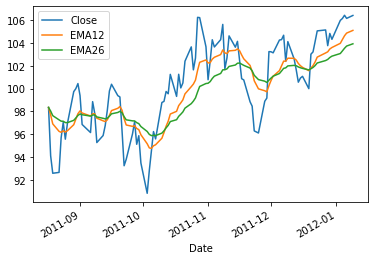

In [34]:
prices = df_data.Close[:100]
prices.plot()
df_data.EMA12[:100].plot()
df_data.EMA26[:100].plot()
plt.legend()

In [ ]:
# price_scaler = StandardScaler()
# df_data_scaled = df_data
# df_data_scaled[['Close']] = price_scaler.fit_transform(df_data_scaled[['Close']])

# indicator_cols =['Week', 'Day', 'PrevDayChng', 'EMA12', 'EMA26', 'MACD', 'Signal']
# indicator_scaler = MinMaxScaler()
# df_data_scaled[indicator_cols] = indicator_scaler.fit_transform(df_data_scaled[indicator_cols])
# df_data_scaled

In [35]:
price_scaler = MinMaxScaler()
df_data_scaled = df_data
df_data_scaled[['Close']] = price_scaler.fit_transform(df_data_scaled[['Close']])

indicator_cols =['Week', 'Day', 'PrevDayChng', 'EMA12', 'EMA26', 'MACD', 'Signal']
indicator_scaler = MinMaxScaler()
df_data_scaled[indicator_cols] = indicator_scaler.fit_transform(df_data_scaled[indicator_cols])
df_data_scaled

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,EMA12,EMA26,MACD,Signal
Date,,,,,,,,,,,,,,
2011-08-17,98.817378,99.598053,97.560076,0.021160,238201100,0.0,0,0.615385,0.50,0.547045,0.010324,0.007207,0.717638,0.716671
2011-08-18,95.735754,98.373622,93.180061,0.009255,512956300,0.0,0,0.615385,0.75,0.547045,0.008450,0.006292,0.707085,0.714153
2011-08-19,92.826686,95.226241,92.448674,0.004940,428281300,0.0,0,0.615385,1.00,0.331482,0.006184,0.005112,0.695114,0.709281
2011-08-22,94.642816,94.692126,92.374746,0.005148,275090600,0.0,0,0.634615,0.00,0.465403,0.004300,0.004036,0.686175,0.703250
2011-08-23,92.982843,95.793282,92.514437,0.013708,331136600,0.0,0,0.634615,0.25,0.551041,0.004054,0.003698,0.687118,0.698651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10,442.609985,443.440002,441.880005,0.987955,43339300,0.0,0,0.596154,0.25,0.542978,0.992122,0.993064,0.825867,0.846368
2021-08-11,443.820007,443.880005,442.619995,0.991043,44034300,0.0,0,0.596154,0.50,0.553264,0.993778,0.994622,0.827174,0.846570
2021-08-12,443.619995,445.260010,442.660004,0.994778,38909400,0.0,0,0.596154,0.75,0.559468,0.995767,0.996352,0.830260,0.847467


In [36]:
#Use previous 60-days to predict next 10-days
scaled_prices = df_data_scaled.Close
prices_len = len(scaled_prices)

prev_100_lst = []
date_indicators = [] #Week of year, Day of week, Prev Day % Change
MACD_indicators = [] #EMA12, EMA26, MACD, Signal
next_1_lst = []

for i in range(prices_len - 100):
    prev_100_day = scaled_prices[i:i+100]
    prev_100_lst.append(prev_100_day)

    next_1_day = scaled_prices[i+100]
    next_1_lst.append(next_1_day)

    date_indicators.append([df_data_scaled.Week[i+100], df_data_scaled.Day[i+100], df_data_scaled.PrevDayChng[i+100]])
    MACD_indicators.append([df_data_scaled.EMA12[i+100], df_data_scaled.EMA26[i+100], df_data_scaled.MACD[i+100], df_data_scaled.Signal[i+100]])

# X = np.hstack([np.array(prev_100_lst), np.array(date_indicators), np.array(MACD_indicators)])
X = np.array(prev_100_lst)
y = np.array(next_1_lst)
print(X.shape, y.shape)


#Tran/Test Split
X_train = X[:-60]
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X[len(X)-60:]
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

y_train = y[:-60]
y_train = y_train.reshape(-1,1)
y_test = y[len(y)-60:]
y_test = y_test.reshape(-1,1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(y_test)

(2416, 100) (2416,)
(2356, 100, 1) (60, 100, 1)
(2356, 1) (60, 1)
[[0.90627096]
 [0.91810875]
 [0.91550611]
 [0.9178289 ]
 [0.91844454]
 [0.92054345]
 [0.91950805]
 [0.92135496]
 [0.91698929]
 [0.92770771]
 [0.92656032]
 [0.92681215]
 [0.92504903]
 [0.93053416]
 [0.93249314]
 [0.93515173]
 [0.93296894]
 [0.92633634]
 [0.9259446 ]
 [0.91001387]
 [0.92669142]
 [0.9330087 ]
 [0.93157684]
 [0.93859604]
 [0.94283558]
 [0.94525023]
 [0.94589603]
 [0.94690675]
 [0.95356094]
 [0.96279823]
 [0.96058014]
 [0.96487589]
 [0.95493676]
 [0.96785202]
 [0.972232  ]
 [0.96804858]
 [0.96987356]
 [0.96569014]
 [0.95611594]
 [0.93823103]
 [0.95532979]
 [0.96512857]
 [0.96768357]
 [0.98026201]
 [0.98329427]
 [0.97765089]
 [0.97714544]
 [0.98225544]
 [0.97624705]
 [0.97366394]
 [0.98365928]
 [0.97756666]
 [0.98537201]
 [0.98742156]
 [0.98641084]
 [0.98795503]
 [0.99104349]
 [0.99477767]
 [0.99705197]
 [1.        ]]


## Model

In [37]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

def LSTM_model():
    model = Sequential()
    model.add(LSTM(100, input_shape=(X.shape[1],1), return_sequences=True))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(75))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = LSTM_model()

In [38]:
from keras.callbacks import EarlyStopping
np.random.seed(1)

callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, verbose=1)

model.fit(X_train, y_train, epochs=50, callbacks=[callback])
# model.fit(X_train, y_train, epochs=20)

Epoch 1/50
74/74 [==============================] - 21s 221ms/step - loss: 0.0064
Epoch 2/50
74/74 [==============================] - 18s 250ms/step - loss: 3.7492e-04
Epoch 3/50
74/74 [==============================] - 16s 217ms/step - loss: 3.4826e-04
Epoch 4/50
74/74 [==============================] - 16s 211ms/step - loss: 3.7345e-04
Epoch 5/50
74/74 [==============================] - 16s 222ms/step - loss: 3.6626e-04
Epoch 6/50
74/74 [==============================] - 16s 210ms/step - loss: 3.2254e-04
Epoch 7/50
74/74 [==============================] - 14s 190ms/step - loss: 3.4906e-04
Epoch 8/50
74/74 [==============================] - 13s 181ms/step - loss: 2.8786e-04
Epoch 9/50
74/74 [==============================] - 13s 176ms/step - loss: 2.9066e-04
Epoch 10/50
74/74 [==============================] - 12s 162ms/step - loss: 3.6439e-04
Epoch 11/50
74/74 [==============================] - 13s 183ms/step - loss: 2.8422e-04
Epoch 12/50
74/74 [==============================] - 13s

In [39]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 79ms/step - loss: 8.7716e-05


8.771594730205834e-05

In [40]:
y_pred_train = model.predict(X_train)
sns.lineplot(x=np.arange(0,len(X_train)), y= y_train[:,0])
sns.lineplot(x=np.arange(0,len(y_train)), y= y_pred_train[:,0])

<AxesSubplot:>

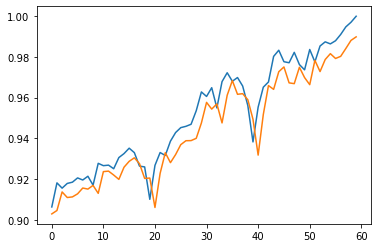

In [ ]:
y_pred_test = model.predict(X_test)
sns.lineplot(x=np.arange(0,len(X_test)), y= y_test[:,0])
sns.lineplot(x=np.arange(0,len(y_test)), y= y_pred_test[:,0])

In [ ]:
price_scaler.inverse_transform(y_pred_test)

array([[2.4020026],
       [2.4093843],
       [2.4494555],
       [2.4374   ],
       [2.4387233],
       [2.445349 ],
       [2.4578593],
       [2.455594 ],
       [2.4635274],
       [2.4463866],
       [2.4932787],
       [2.494348 ],
       [2.4859016],
       [2.476538 ],
       [2.5027797],
       [2.5154738],
       [2.5230443],
       [2.510479 ],
       [2.4786575],
       [2.479402 ],
       [2.415911 ],
       [2.4895477],
       [2.5341363],
       [2.5126238],
       [2.5300882],
       [2.551437 ],
       [2.559949 ],
       [2.5602136],
       [2.565143 ],
       [2.598232 ],
       [2.6426818],
       [2.6281674],
       [2.6394784],
       [2.5983808],
       [2.6581128],
       [2.6897452],
       [2.6601315],
       [2.6614962],
       [2.6484401],
       [2.6063418],
       [2.5288906],
       [2.6165109],
       [2.6789393],
       [2.6707988],
       [2.7088714],
       [2.7191436],
       [2.6848035],
       [2.683104 ],
       [2.718467 ],
       [2.6962266],


# Calculate % gain in 15 days and give buy/sell rating